# Fraud Transaction Detection

## 1. Import the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Load the Train and Test datasets

In [2]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

## 3. Data Visualisation

### i) Count of Fraudulent and Non Fraudulent activities

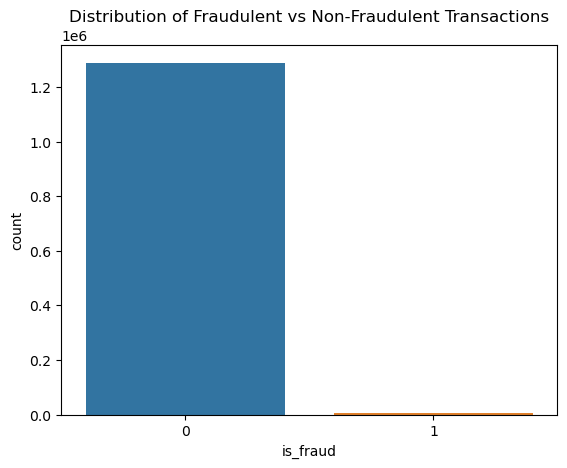

In [3]:
sns.countplot(data=train, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

### ii) Transaction amount in each category

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


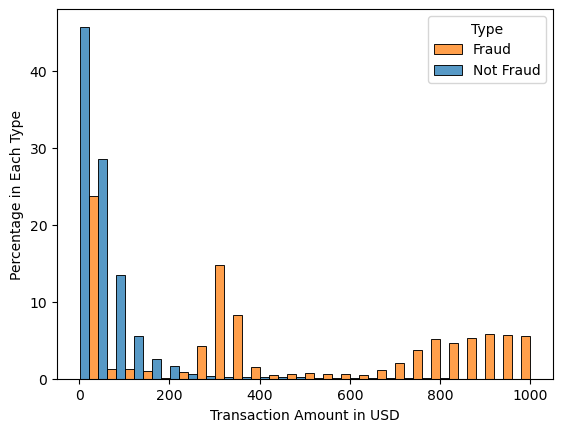

In [4]:
ax=sns.histplot(x='amt',data=train[train.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

### iii) Hourly Activity Trend

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


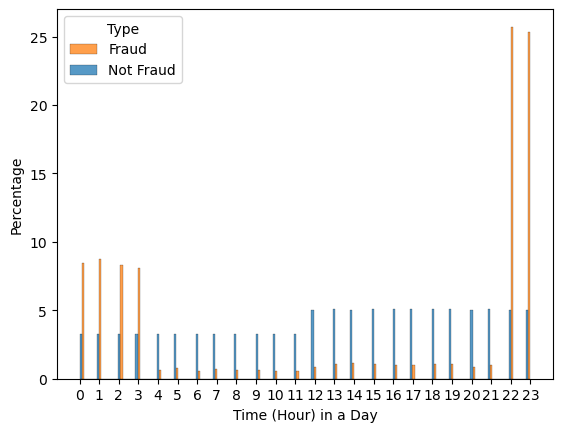

In [5]:
train['hour']=pd.to_datetime(train['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=train, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

### iv) Weekly Activity Trend

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shiva\AppData\Local\Temp\ipykernel_23204\20702635.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


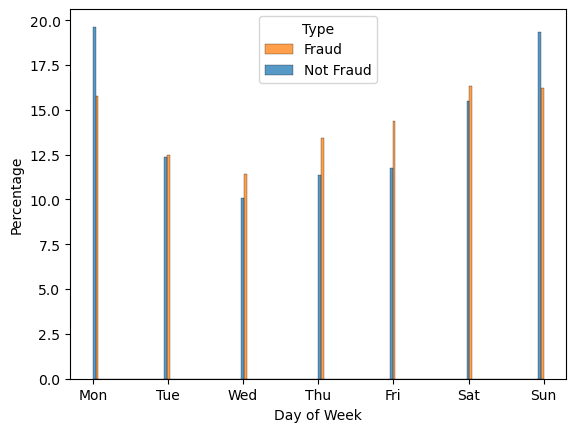

In [6]:
train['day']=pd.to_datetime(train['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=train, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

### v) Monthly Activity Trend

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


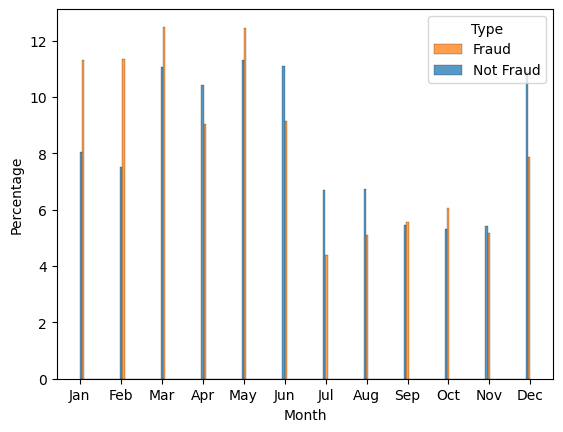

In [7]:
train['month']=pd.to_datetime(train['trans_date_trans_time']).dt.month
ax=sns.histplot(data=train, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

## 4. Data preprocessing

In [8]:
train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hour                     0
day                      0
month                    0
dtype: int64

In [9]:
test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
ytest = test['is_fraud']
xtest = test.drop(['is_fraud'], axis = 1)

In [11]:
y = train['is_fraud']
x = train.drop(['is_fraud', 'day', 'month', 'hour'], axis = 1)

In [12]:
x['trans_date_trans_time'] = pd.to_datetime(x['trans_date_trans_time'])
x['dob'] = pd.to_datetime(x['dob'])

xtest['trans_date_trans_time'] = pd.to_datetime(xtest['trans_date_trans_time'])
xtest['dob'] = pd.to_datetime(xtest['dob'])

In [13]:
x['transaction_year'] = x['trans_date_trans_time'].dt.year
x['transaction_month'] = x['trans_date_trans_time'].dt.month
x['transaction_day'] = x['trans_date_trans_time'].dt.day
x['transaction_hour'] = x['trans_date_trans_time'].dt.hour

xtest['transaction_year'] = xtest['trans_date_trans_time'].dt.year
xtest['transaction_month'] = xtest['trans_date_trans_time'].dt.month
xtest['transaction_day'] = xtest['trans_date_trans_time'].dt.day
xtest['transaction_hour'] = xtest['trans_date_trans_time'].dt.hour

In [14]:
x['birth_year'] = x['dob'].dt.year
x['birth_month'] = x['dob'].dt.month
x['birth_day'] = x['dob'].dt.day

xtest['birth_year'] = xtest['dob'].dt.year
xtest['birth_month'] = xtest['dob'].dt.month
xtest['birth_day'] = xtest['dob'].dt.day

In [15]:
x.drop(['trans_date_trans_time', 'dob'], axis = 1, inplace = True)
xtest.drop(['trans_date_trans_time', 'dob'], axis = 1, inplace = True)
x

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,2019,1,1,0,1988,3,9
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,2019,1,1,0,1978,6,21
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,2019,1,1,0,1962,1,19
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,2019,1,1,0,1967,1,12
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,2019,1,1,0,1986,3,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,1371816728,36.841266,-111.690765,2020,6,21,12,1961,11,24
1296671,1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,1371816739,38.906881,-78.246528,2020,6,21,12,1979,12,11
1296672,1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,1371816752,33.619513,-105.130529,2020,6,21,12,1967,8,30
1296673,1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,1371816816,42.788940,-103.241160,2020,6,21,12,1980,8,18


In [16]:
x.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
xtest.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [17]:
x.shape

(1296675, 22)

In [18]:
xtest.shape

(555719, 22)

In [19]:
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']

for col in label_encode_cols:
    le = LabelEncoder()
    
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le
    
    xtest[col] = le.fit_transform(xtest[col])
    label_encoders[col] = le

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

## 5. Classification

### i) Logistic regression

In [21]:
clf_lr = LogisticRegression(max_iter=1000000)
clf_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000000)

In [22]:
y_pred_lr = clf_lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
pred_score_lr = accuracy_score(y_test, y_pred_lr)
pred_score_lr

0.9943547920643183

In [24]:
y_pred_lr1 = clf_lr.predict(xtest)
y_pred_lr1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
pred_score_lr1 = accuracy_score(ytest, y_pred_lr1)
print("LOGISTIC REGRESSION CLASSIFICATION REPORT:")
print("ACCURACY SCORE: ",pred_score_lr1)
print("CLASSIFICATION REPORT: ")
print(classification_report(ytest, y_pred_lr1))
print("CONFUSION MATRIX: ")
print(confusion_matrix(ytest, y_pred_lr1))

NAIVE BAYES CLASSIFICATION REPORT:
ACCURACY SCORE:  0.9961401355721147
CLASSIFICATION REPORT: 


C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

CONFUSION MATRIX: 
[[553574      0]
 [  2145      0]]


C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ii) Decision Tree Classification

In [27]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred_dt = clf_dt.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
pred_score_dt = accuracy_score(y_test, y_pred_dt)
pred_score_dt

0.9977365184028381

In [30]:
y_pred_dt1 = clf_dt.predict(xtest)
y_pred_dt1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
pred_score_dt1 = accuracy_score(ytest, y_pred_dt1)
print("DECISION TREE CLASSIFICATION REPORT:")
print("ACCURACY SCORE: ",pred_score_dt1)
print("CLASSIFICATION REPORT: ")
print(classification_report(ytest, y_pred_dt1))
print("CONFUSION MATRIX: ")
print(confusion_matrix(ytest, y_pred_dt1))

DECISION TREE CLASSIFICATION REPORT:
ACCURACY SCORE:  0.9742765678337433
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.11      0.79      0.19      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.88      0.59    555719
weighted avg       1.00      0.97      0.98    555719

CONFUSION MATRIX: 
[[539733  13841]
 [   454   1691]]


### iii) Random Forest Classification

In [32]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
y_pred_rf = classifier_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
pred_score_rf = accuracy_score(y_test, y_pred_rf)
pred_score_rf

0.9984113212640021

In [35]:
y_pred_rf1 = classifier_rf.predict(xtest)
y_pred_rf1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
pred_score_rf1 = accuracy_score(ytest, y_pred_rf1)
print("RANDOM FOREST CLASSIFICATION REPORT:")
print("ACCURACY SCORE: ",pred_score_rf1)
print("CLASSIFICATION REPORT: ")
print(classification_report(ytest, y_pred_rf1))
print("CONFUSION MATRIX: ")
print(confusion_matrix(ytest, y_pred_rf1))

RANDOM FOREST CLASSIFICATION REPORT:
ACCURACY SCORE:  0.9985262335820801
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.97      0.64      0.77      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.82      0.88    555719
weighted avg       1.00      1.00      1.00    555719

CONFUSION MATRIX: 
[[553531     43]
 [   776   1369]]
